# Поиск частых наборов
## Елисеев ЕВ КЭ-403

### Задание


Разработайте программу, которая выполняет поиск частых наборов объектов в заданном наборе данных с помощью алгоритма Apriori (или одной из его модификаций). <br>
Список результирующих наборов должен содержать как наборы, так и значение поддержки для каждого набора. <br>
Параметрами программы являются набор, порог поддержки и способ упорядочивания результирующего списка наборов (по убыванию значения поддержки или лексикографическое).<br>
Проведите эксперименты на наборе данных baskets.csv (сведения о покупках в супермаркете). В экспериментах варьируйте пороговое значение поддержки (например: 1%, 3%, 5%, 10%, 15%). <br>
Выполните визуализацию результатов экспериментов в виде следующих диаграмм:
- сравнение быстродействия на фиксированном наборе данных при изменяемом пороге поддержки;
- количество частых наборов объектов различной длины на фиксированном наборе данных при изменяемом пороге поддержки.<br>

Подготовьте отчет о выполнении задания и загрузите отчет в формате PDF в систему. Отчет должен представлять собой связный и структурированный документ со следующими разделами: <br> 
- формулировка задания; 
- гиперссылка на каталог репозитория с исходными текстами, наборами данных и др. сопутствующими материалами; 
- рисунки с результатами визуализации; 
- пояснения, раскрывающие смысл полученных результатов.

### Программа поиска частых наборов

In [1]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import numpy as np


# получение исходных данных
df = pd.read_csv("baskets.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,креветки,миндаль,авокадо,овощная смесь,зеленый виноград,цельнозерновая мука,батат,творог,энергетический напиток,томатный сок,низкокалорийный йогурт,зеленый чай,мед,салат,минеральная вода,лосось,ягодный сок,замороженный смузи,шпинат,оливковое масло
1,гамбургер,фрикадельки,яйца,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,чатни,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,индейка,авокадо,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,минеральная вода,молоко,энергетический батончик,рис,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,сливочное масло,низкокалорийный майонез,свежий хлеб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,гамбургер,замороженные овощи,яйца,картофель-фри,журнал,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,курица,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,эскалоп,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# функция поиска частых наборов
def find_frequent_itemsets(df: pd.DataFrame, 
                           min_supp: float=0.1, 
                           sort_by: str='supp', 
                           min_items: int=1) -> pd.DataFrame:
    
    def desk_supp_sort(items):
        return items.sort_values(by='support', ascending=False)
    
    def lexicographic_sort(items):
        return items.sort_values(by='itemsets')
    
    SORT_METHOD = {'supp': desk_supp_sort,
                   'lex': lexicographic_sort}

    # Преобразование данных в список списков для подачи в метод fit
    transactions = df.values.tolist()

    # Удаление значений NaN из транзакций
    transactions = [[item for item in transaction if not pd.isnull(item)] for transaction in transactions]

    # Преобразование в разряженную матрицу
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    transactions_matrix = pd.DataFrame(te_ary, columns=te.columns_)
    
    # Поиск частых наборов
    frequent_itemsets = apriori(transactions_matrix, min_support=min_supp, use_colnames=True)
    
    # Сортировка элементов в каждом наборе
    frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: sorted(list(x)))
    frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: x if len(x) >= min_items else None)
    frequent_itemsets.dropna(inplace=True)
    
    return SORT_METHOD[sort_by](frequent_itemsets)

### Эксперименты

In [3]:
# Первые 10 наборов отсортированных по поддержке с минимальной поддержкой 0.01
freq_items = find_frequent_itemsets(df, min_supp=0.01, sort_by='supp')
freq_items.head(10)

,support,itemsets
31,0.238368,[минеральная вода]
26,0.187975,[макароны]
73,0.179709,[яйца]
20,0.170911,[картофель-фри]
69,0.163845,[шоколад]
17,0.132116,[зеленый чай]
32,0.129583,[молоко]
9,0.098254,[говяжий фарш]
15,0.095321,[замороженные овощи]
5,0.095054,[блинчики]


In [4]:
# Самый длинный набор 
index = freq_items['itemsets'].apply(len).idxmax()
freq_items.loc[index, 'itemsets']

['говяжий фарш', 'макароны', 'минеральная вода']

Результаты можно интерпретировать в целом, как топ 10 самых популярных продуктов <br>
Чаще всего люди докупают недостающие продукты домой, либо воду или шоколад, чтобы быстро<br>
утолить голод и жажду

In [5]:
# Первые 10 наборов отсортированных по поддержке с минимальной поддержкой 0.001 и минимальным числом элементов 2
freq_items = find_frequent_itemsets(df, min_supp=0.01, sort_by='supp', min_items=2)
freq_items.head(10)

,support,itemsets
183,0.061192,"[макароны, минеральная вода]"
211,0.052660,"[минеральная вода, шоколад]"
213,0.050927,"[минеральная вода, яйца]"
199,0.047994,"[минеральная вода, молоко]"
105,0.040928,"[говяжий фарш, минеральная вода]"
195,0.040795,"[макароны, шоколад]"
104,0.040261,"[говяжий фарш, макароны]"
197,0.038662,"[макароны, яйца]"
184,0.036928,"[макароны, молоко]"
165,0.036395,"[картофель-фри, яйца]"


Из наборов [макароны, минеральная вода], [минеральная вода, яйца], [минеральная вода, молоко], <br>
можно предположить, что люди могут заходить в магазин за минеральной водой из-за жажды, а <br>
сопутсвующие товары (макароны, яйца, молоко) докупать домой, как недостоющие.<br>
То же самое можно сказать про [макароны, шоколад]
Такие товары, как [говяжий фарш, макароны] или [макароны, яйца] могут быть ингредентами <br>
для какого-нибудь блюда, поэтому их могут часто покупать вместе

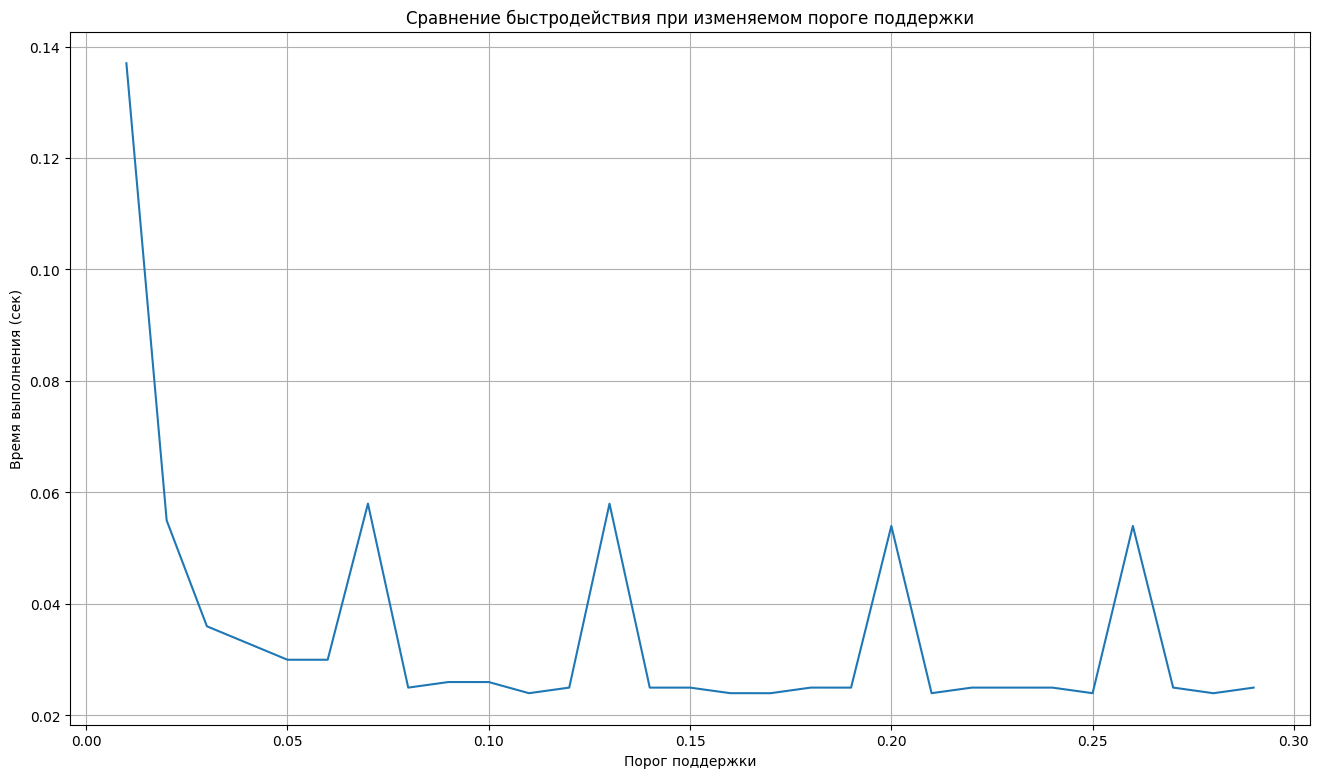

In [7]:
import time
import matplotlib.pyplot as plt


def vizulize_perfomance_by_min_sup(items, min_supp):
    times = []
    supp = []
    while min_supp < 0.3:
        start_time = time.time()
        find_frequent_itemsets(items, min_supp=min_supp, sort_by='supp')
        execution_time = time.time() - start_time
        times.append(execution_time)
        supp.append(min_supp)
        
        min_supp += 0.01
        min_supp = round(min_supp, 2)
        
    plt.figure(figsize=(16, 9))
    plt.plot(supp, times)
    plt.title('Сравнение быстродействия при изменяемом пороге поддержки')
    plt.xlabel('Порог поддержки')
    plt.ylabel('Время выполнения (сек)')
    plt.grid(True)
    plt.show()
    
    
vizulize_perfomance_by_min_sup(df, 0.01)

C:\Users\santiperro\AppData\Local\Temp\ipykernel_30020\4092154251.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  number_of_items_by_length[length].append(counts.get(length, 0))
C:\Users\santiperro\AppData\Local\Temp\ipykernel_30020\4092154251.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  number_of_items_by_length[length].append(counts.get(length, 0))
C:\Users\santiperro\AppData\Local\Temp\ipykernel_30020\4092154251.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To a

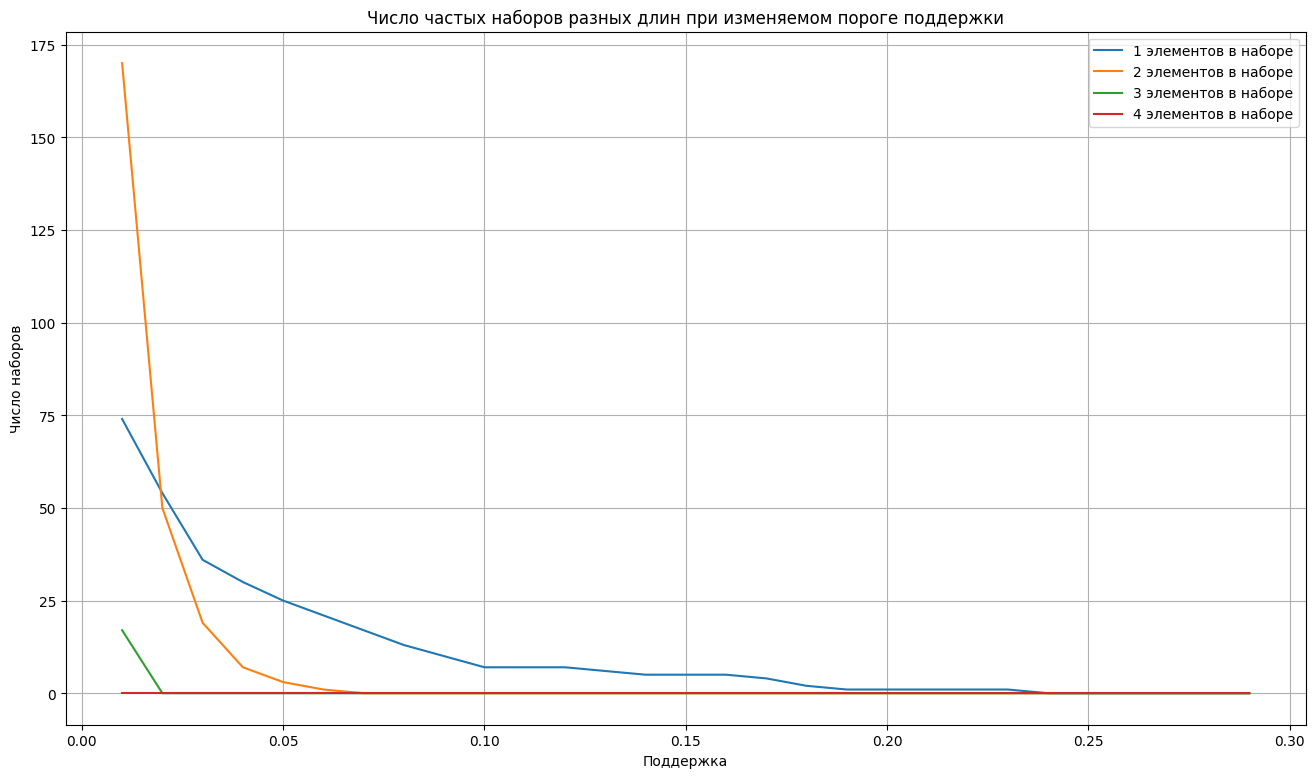

In [20]:
def vizulize_number_of_items_by_min_sup(items, min_supp):
    # Создаем словарь для хранения результатов с максимальной длиной набора 5
    number_of_items_by_length = {i: [] for i in range(1, 5)}
    supports = []
    
    while min_supp < 0.3:
        frequent_itemsets = find_frequent_itemsets(df, min_supp=min_supp, sort_by='supp', min_items=1)
        
        # Подсчет количества наборов разной длины
        counts = frequent_itemsets['itemsets'].apply(len).value_counts().sort_index()
    
        # Сохраняем результаты
        for length in number_of_items_by_length.keys():
            number_of_items_by_length[length].append(counts.get(length, 0))
        supports.append(min_supp)   
        
        min_supp += 0.01
        min_supp = round(min_supp, 2)
        
    # Создаем диаграмму
    plt.figure(figsize=(16, 9))

    # Для каждой длины набора
    for length, counts in number_of_items_by_length.items():
        plt.plot(supports, counts, label=f'{length} элементов в наборе')

    plt.xlabel('Поддержка')
    plt.ylabel('Число наборов')
    plt.title('Число частых наборов разных длин при изменяемом пороге поддержки')
    plt.legend()
    plt.grid(True)
    plt.show()
    

vizulize_number_of_items_by_min_sup(df, 0.01)